## This task is focused on analyzing the tweets of Nigerians to gain insights into the perceptions of the voters ahead of the February 25th 2023 Presidential Election in the country.


#### Steps involved in the Data Analysis.

##### Data Preparation
##### Data cleaning in order to prepare the data for analysis.
##### Sentiment analysis to provide some insight into the content of the reviews.
##### Visualization of analyzed sentiments to understand the perception of voters regarding the election

# Exploratory Data Analysis and Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("nigerian_presidential_election_2023_tweets.csv")
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1617619263392743424,Fabulous Faga,"Abakaliki, Nigeria",🌹A Social media influencer\n💃A scientist by pr...,2020-10-19 08:02:47+00:00,244,999,686,False,2023-01-23 20:24:20+00:00,#OBI and #wife storm kastina state today.\n\nS...,"['OBI', 'wife']",Twitter for Android,0.0,5.0,False
1,1617648566977302534,Patriotic Nigerian,"Lagos, Nigeria",inspiring and amazingly created. Marketing/ Br...,2021-03-30 22:04:11+00:00,688,2827,3488,False,2023-01-23 22:20:47+00:00,"If they can’t point to you one project , inves...","['peterobi', 'Atiku']",Twitter for iPhone,11.0,15.0,False
2,1617657018873171969,Promise,NaN,Health and Fitness enthusiast,2022-05-06 23:03:08+00:00,2,22,40,False,2023-01-23 22:54:22+00:00,@atiku God with his infinite mercy will never ...,NaN,Twitter for iPhone,0.0,0.0,False
3,1617584206317752321,KemKem,"Lagos, Nigeria",My Tweets & Views are Personal & do not\nrefle...,2015-01-01 07:40:09+00:00,24474,1931,129947,False,2023-01-23 18:05:02+00:00,Governor @RotimiAkeredolu takes Asiwaju Bola A...,NaN,Twitter for Android,14.0,40.0,False
4,1617619489184690178,Mo'6icky,NaN,"By nature, an optimist_📌",2019-05-09 16:31:33+00:00,22,198,540,False,2023-01-23 20:25:14+00:00,@atiku Salutation is not Love. #Obi is coming,['Obi'],Twitter for Android,0.0,4.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46310,1625234504125190144,Atiku Abubakar,NaN,Former Vice President of Nigeria. Waziri Adama...,2010-08-12 14:38:36+00:00,4817976,161,745,True,2023-02-13 20:44:35+00:00,I also mentioned to them the benefits that wil...,NaN,Twitter for iPhone,67.0,284.0,False
46311,1625234498131488775,Atiku Abubakar,NaN,Former Vice President of Nigeria. Waziri Adama...,2010-08-12 14:38:36+00:00,4817976,161,745,True,2023-02-13 20:44:34+00:00,I told the people that more than any other can...,NaN,Twitter for iPhone,57.0,240.0,False
46312,1625234482021138432,Atiku Abubakar,NaN,Former Vice President of Nigeria. Waziri Adama...,2010-08-12 14:38:36+00:00,4817976,161,745,True,2023-02-13 20:44:30+00:00,Our rally in Calabar today provided an opportu...,NaN,Twitter for iPhone,440.0,2056.0,False
46313,1625149349364727809,Atiku Abubakar,NaN,Former Vice President of Nigeria. Waziri Adama...,2010-08-12 14:38:36+00:00,4817976,161,745,True,2023-02-13 15:06:13+00:00,alongside all the paramount rulers from all th...,NaN,Twitter for iPhone,61.0,225.0,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46315 entries, 0 to 46314
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                46315 non-null  object 
 1   user_name         46315 non-null  object 
 2   user_location     34298 non-null  object 
 3   user_description  41382 non-null  object 
 4   user_created      46314 non-null  object 
 5   user_followers    46314 non-null  object 
 6   user_friends      46314 non-null  object 
 7   user_favourites   46314 non-null  object 
 8   user_verified     46314 non-null  object 
 9   date              46314 non-null  object 
 10  text              46314 non-null  object 
 11  hashtags          23488 non-null  object 
 12  source            46314 non-null  object 
 13  retweets          46313 non-null  float64
 14  favorites         46313 non-null  float64
 15  is_retweet        46313 non-null  object 
dtypes: float64(2), object(14)
memory usage: 

In [4]:
#Checking reaction dataframe for null values

df.isnull().any()

id                  False
user_name           False
user_location        True
user_description     True
user_created         True
user_followers       True
user_friends         True
user_favourites      True
user_verified        True
date                 True
text                 True
hashtags             True
source               True
retweets             True
favorites            True
is_retweet           True
dtype: bool

In [5]:
# Checking for unique values in the dataframe

for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

id 46315 ['1617619263392743424' '1617648566977302534' '1617657018873171969' ...
 1625234482021138432 1625149349364727809 1625149341181661187]
user_name 14871 ['Fabulous Faga' 'Patriotic Nigerian' 'Promise' ... 'Kayode Makinde'
 'Akanni🤍✴️' 'Success']
user_location 3561 ['Abakaliki, Nigeria' 'Lagos, Nigeria' nan ... 'On planet Earth'
 'Kano, Nigeria ' 'Peace of mind']
user_description 13814 ['🌹A Social media influencer\n💃A scientist by profession'
 'inspiring and amazingly created. Marketing/ Brand Communications & PR Specialist/Politics/Progressive/Brand activation/ Media placement/ Old account lost, FB'
 'Health and Fitness enthusiast' ...
 'Data scientist, Machine Learning Research Enthusiast, Son of God .'
 'Building construction/industry | ⚽🎾🏀▶️🎶 @ManUtd ❤️| nothing but joy 🙅🏻\u200d♂️email; ajiboladesire@gmail.com'
 'A lady with a heart of Gold. Loving and Saying the truth. A game changer.']
user_created 14906 ['2020-10-19 08:02:47+00:00' '2021-03-30 22:04:11+00:00'
 '2022-05-06 23

In [6]:
#Checking reaction dataframe for null values

df.isnull().any()

id                  False
user_name           False
user_location        True
user_description     True
user_created         True
user_followers       True
user_friends         True
user_favourites      True
user_verified        True
date                 True
text                 True
hashtags             True
source               True
retweets             True
favorites            True
is_retweet           True
dtype: bool

In [7]:
# Replacing nan values in the data with unknown
df.user_location.fillna('Unknown', inplace=True)
#df.hashtags.fillna('Unknown', inplace=True)
df.text.fillna("Unknown", inplace= True)
#df.user_verified.fillna("Unknown", inplace=True)

# Replacing nan values with 0 in columns with integers
#df.user_followers.fillna(0, inplace=True)
#df.user_friends.fillna(0, inplace=True)
#df.user_favourites.fillna(0, inplace=True)
#df.retweets.fillna(0, inplace=True)
#df.favorites.fillna(0, inplace=True)

# Sentiment Analysis

In [8]:
#creating a new dataframe for sentiment analysis
df2 = df[["text"]]
df2.head()

,text
0,#OBI and #wife storm kastina state today.\n\nS...
1,"If they can’t point to you one project , inves..."
2,@atiku God with his infinite mercy will never ...
3,Governor @RotimiAkeredolu takes Asiwaju Bola A...
4,@atiku Salutation is not Love. #Obi is coming


In [9]:
# Extracting crucial metrics from the scrapped data
# First = the wordcount of each review
# creating a new column known as "wordcount"

df2["word_count"] = df2['text'].apply(lambda x: len(x.split()))
df2

,text,word_count
0,#OBI and #wife storm kastina state today.\n\nS...,19
1,"If they can’t point to you one project , inves...",21
2,@atiku God with his infinite mercy will never ...,21
3,Governor @RotimiAkeredolu takes Asiwaju Bola A...,16
4,@atiku Salutation is not Love. #Obi is coming,8
...,...,...
46310,I also mentioned to them the benefits that wil...,21
46311,I told the people that more than any other can...,22
46312,Our rally in Calabar today provided an opportu...,20
46313,alongside all the paramount rulers from all th...,21


In [10]:
# Secondly = Character count of eacch review

df2["character_count"] = df2['text'].apply(lambda x: len(x))
df2

,text,word_count,character_count
0,#OBI and #wife storm kastina state today.\n\nS...,19,128
1,"If they can’t point to you one project , inves...",21,140
2,@atiku God with his infinite mercy will never ...,21,140
3,Governor @RotimiAkeredolu takes Asiwaju Bola A...,16,129
4,@atiku Salutation is not Love. #Obi is coming,8,45
...,...,...,...
46310,I also mentioned to them the benefits that wil...,21,140
46311,I told the people that more than any other can...,22,140
46312,Our rally in Calabar today provided an opportu...,20,140
46313,alongside all the paramount rulers from all th...,21,140


In [11]:
# Thirdly = create a function to determine
# average word in each review

def average_word(text):
    words = text.split()
    return (sum(len(word) for word in words) / len(words))

In [12]:
# Fourthly - Determine the stopword count
# Import stopwords library

from nltk.corpus import stopwords

In [13]:
stop_words = stopwords.words('English')
df['stopword_count'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,stopword_count
0,1617619263392743424,Fabulous Faga,"Abakaliki, Nigeria",🌹A Social media influencer\n💃A scientist by pr...,2020-10-19 08:02:47+00:00,244,999,686,False,2023-01-23 20:24:20+00:00,#OBI and #wife storm kastina state today.\n\nS...,"['OBI', 'wife']",Twitter for Android,0.0,5.0,False,6
1,1617648566977302534,Patriotic Nigerian,"Lagos, Nigeria",inspiring and amazingly created. Marketing/ Br...,2021-03-30 22:04:11+00:00,688,2827,3488,False,2023-01-23 22:20:47+00:00,"If they can’t point to you one project , inves...","['peterobi', 'Atiku']",Twitter for iPhone,11.0,15.0,False,7
2,1617657018873171969,Promise,Unknown,Health and Fitness enthusiast,2022-05-06 23:03:08+00:00,2,22,40,False,2023-01-23 22:54:22+00:00,@atiku God with his infinite mercy will never ...,NaN,Twitter for iPhone,0.0,0.0,False,9
3,1617584206317752321,KemKem,"Lagos, Nigeria",My Tweets & Views are Personal & do not\nrefle...,2015-01-01 07:40:09+00:00,24474,1931,129947,False,2023-01-23 18:05:02+00:00,Governor @RotimiAkeredolu takes Asiwaju Bola A...,NaN,Twitter for Android,14.0,40.0,False,2
4,1617619489184690178,Mo'6icky,Unknown,"By nature, an optimist_📌",2019-05-09 16:31:33+00:00,22,198,540,False,2023-01-23 20:25:14+00:00,@atiku Salutation is not Love. #Obi is coming,['Obi'],Twitter for Android,0.0,4.0,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46310,1625234504125190144,Atiku Abubakar,Unknown,Former Vice President of Nigeria. Waziri Adama...,2010-08-12 14:38:36+00:00,4817976,161,745,True,2023-02-13 20:44:35+00:00,I also mentioned to them the benefits that wil...,NaN,Twitter for iPhone,67.0,284.0,False,9
46311,1625234498131488775,Atiku Abubakar,Unknown,Former Vice President of Nigeria. Waziri Adama...,2010-08-12 14:38:36+00:00,4817976,161,745,True,2023-02-13 20:44:34+00:00,I told the people that more than any other can...,NaN,Twitter for iPhone,57.0,240.0,False,10
46312,1625234482021138432,Atiku Abubakar,Unknown,Former Vice President of Nigeria. Waziri Adama...,2010-08-12 14:38:36+00:00,4817976,161,745,True,2023-02-13 20:44:30+00:00,Our rally in Calabar today provided an opportu...,NaN,Twitter for iPhone,440.0,2056.0,False,7
46313,1625149349364727809,Atiku Abubakar,Unknown,Former Vice President of Nigeria. Waziri Adama...,2010-08-12 14:38:36+00:00,4817976,161,745,True,2023-02-13 15:06:13+00:00,alongside all the paramount rulers from all th...,NaN,Twitter for iPhone,61.0,225.0,False,7


In [14]:
# create a column for average word
df2['average_word'] = df['text'].apply(lambda x: average_word(x))
df2

,text,word_count,character_count,average_word
0,#OBI and #wife storm kastina state today.\n\nS...,19,128,5.736842
1,"If they can’t point to you one project , inves...",21,140,5.714286
2,@atiku God with his infinite mercy will never ...,21,140,5.714286
3,Governor @RotimiAkeredolu takes Asiwaju Bola A...,16,129,7.062500
4,@atiku Salutation is not Love. #Obi is coming,8,45,4.750000
...,...,...,...,...
46310,I also mentioned to them the benefits that wil...,21,140,5.714286
46311,I told the people that more than any other can...,22,140,5.409091
46312,Our rally in Calabar today provided an opportu...,20,140,6.050000
46313,alongside all the paramount rulers from all th...,21,140,5.714286


In [15]:
df.describe()

,retweets,favorites,stopword_count
count,46313.000000,46313.000000,46315.000000
mean,39.073543,138.842161,4.427788
std,515.422213,1812.622186,3.224393
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000
50%,0.000000,0.000000,4.000000
75%,1.000000,3.000000,7.000000
max,38252.000000,105022.000000,18.000000


# Natural Language Processing

### Data Cleaning

### Lowercasing all words

### Removing punctuation

### Removing stopwords

In [16]:
# converting the words in the review to lower case

df2['text_lower'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['text_lower']

0        #obi and #wife storm kastina state today. see ...
1        if they can’t point to you one project , inves...
2        @atiku god with his infinite mercy will never ...
3        governor @rotimiakeredolu takes asiwaju bola a...
4            @atiku salutation is not love. #obi is coming
                               ...                        
46310    i also mentioned to them the benefits that wil...
46311    i told the people that more than any other can...
46312    our rally in calabar today provided an opportu...
46313    alongside all the paramount rulers from all th...
46314    upon landing in calabar for what promises to b...
Name: text_lower, Length: 46315, dtype: object

In [17]:
# Punctuation and special symbols removal

df2['text_punctuation_removal'] = df2['text_lower'].str.replace('[^\w\s]', '', regex= True)
df2

,text,word_count,character_count,average_word,text_lower,text_punctuation_removal
0,#OBI and #wife storm kastina state today.\n\nS...,19,128,5.736842,#obi and #wife storm kastina state today. see ...,obi and wife storm kastina state today see cro...
1,"If they can’t point to you one project , inves...",21,140,5.714286,"if they can’t point to you one project , inves...",if they cant point to you one project investm...
2,@atiku God with his infinite mercy will never ...,21,140,5.714286,@atiku god with his infinite mercy will never ...,atiku god with his infinite mercy will never a...
3,Governor @RotimiAkeredolu takes Asiwaju Bola A...,16,129,7.062500,governor @rotimiakeredolu takes asiwaju bola a...,governor rotimiakeredolu takes asiwaju bola ah...
4,@atiku Salutation is not Love. #Obi is coming,8,45,4.750000,@atiku salutation is not love. #obi is coming,atiku salutation is not love obi is coming
...,...,...,...,...,...,...
46310,I also mentioned to them the benefits that wil...,21,140,5.714286,i also mentioned to them the benefits that wil...,i also mentioned to them the benefits that wil...
46311,I told the people that more than any other can...,22,140,5.409091,i told the people that more than any other can...,i told the people that more than any other can...
46312,Our rally in Calabar today provided an opportu...,20,140,6.050000,our rally in calabar today provided an opportu...,our rally in calabar today provided an opportu...
46313,alongside all the paramount rulers from all th...,21,140,5.714286,alongside all the paramount rulers from all th...,alongside all the paramount rulers from all th...


In [18]:
# Remove Stopwords from column with  no punctuation

df2['text_nopunc_nostop'] = df2['text_punctuation_removal'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df2

,text,word_count,character_count,average_word,text_lower,text_punctuation_removal,text_nopunc_nostop
0,#OBI and #wife storm kastina state today.\n\nS...,19,128,5.736842,#obi and #wife storm kastina state today. see ...,obi and wife storm kastina state today see cro...,obi wife storm kastina state today see crowd n...
1,"If they can’t point to you one project , inves...",21,140,5.714286,"if they can’t point to you one project , inves...",if they cant point to you one project investm...,cant point one project investment vision legac...
2,@atiku God with his infinite mercy will never ...,21,140,5.714286,@atiku god with his infinite mercy will never ...,atiku god with his infinite mercy will never a...,atiku god infinite mercy never allow emerge pr...
3,Governor @RotimiAkeredolu takes Asiwaju Bola A...,16,129,7.062500,governor @rotimiakeredolu takes asiwaju bola a...,governor rotimiakeredolu takes asiwaju bola ah...,governor rotimiakeredolu takes asiwaju bola ah...
4,@atiku Salutation is not Love. #Obi is coming,8,45,4.750000,@atiku salutation is not love. #obi is coming,atiku salutation is not love obi is coming,atiku salutation love obi coming
...,...,...,...,...,...,...,...
46310,I also mentioned to them the benefits that wil...,21,140,5.714286,i also mentioned to them the benefits that wil...,i also mentioned to them the benefits that wil...,also mentioned benefits come major policy thru...
46311,I told the people that more than any other can...,22,140,5.409091,i told the people that more than any other can...,i told the people that more than any other can...,told people candidate election know better imp...
46312,Our rally in Calabar today provided an opportu...,20,140,6.050000,our rally in calabar today provided an opportu...,our rally in calabar today provided an opportu...,rally calabar today provided opportunity tell ...
46313,alongside all the paramount rulers from all th...,21,140,5.714286,alongside all the paramount rulers from all th...,alongside all the paramount rulers from all th...,alongside paramount rulers 18 local government...


# Text Lemmatization 
### This will reduce the number of words available for analysis by combining similar forms into one base form.

In [19]:
# Import textblob
from textblob import Word

# Lemmatize final review format
df2['lemmatized_review'] = df2['text_nopunc_nostop'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df2

,text,word_count,character_count,average_word,text_lower,text_punctuation_removal,text_nopunc_nostop,lemmatized_review
0,#OBI and #wife storm kastina state today.\n\nS...,19,128,5.736842,#obi and #wife storm kastina state today. see ...,obi and wife storm kastina state today see cro...,obi wife storm kastina state today see crowd n...,obi wife storm kastina state today see crowd n...
1,"If they can’t point to you one project , inves...",21,140,5.714286,"if they can’t point to you one project , inves...",if they cant point to you one project investm...,cant point one project investment vision legac...,cant point one project investment vision legac...
2,@atiku God with his infinite mercy will never ...,21,140,5.714286,@atiku god with his infinite mercy will never ...,atiku god with his infinite mercy will never a...,atiku god infinite mercy never allow emerge pr...,atiku god infinite mercy never allow emerge pr...
3,Governor @RotimiAkeredolu takes Asiwaju Bola A...,16,129,7.062500,governor @rotimiakeredolu takes asiwaju bola a...,governor rotimiakeredolu takes asiwaju bola ah...,governor rotimiakeredolu takes asiwaju bola ah...,governor rotimiakeredolu take asiwaju bola ahm...
4,@atiku Salutation is not Love. #Obi is coming,8,45,4.750000,@atiku salutation is not love. #obi is coming,atiku salutation is not love obi is coming,atiku salutation love obi coming,atiku salutation love obi coming
...,...,...,...,...,...,...,...,...
46310,I also mentioned to them the benefits that wil...,21,140,5.714286,i also mentioned to them the benefits that wil...,i also mentioned to them the benefits that wil...,also mentioned benefits come major policy thru...,also mentioned benefit come major policy thrus...
46311,I told the people that more than any other can...,22,140,5.409091,i told the people that more than any other can...,i told the people that more than any other can...,told people candidate election know better imp...,told people candidate election know better imp...
46312,Our rally in Calabar today provided an opportu...,20,140,6.050000,our rally in calabar today provided an opportu...,our rally in calabar today provided an opportu...,rally calabar today provided opportunity tell ...,rally calabar today provided opportunity tell ...
46313,alongside all the paramount rulers from all th...,21,140,5.714286,alongside all the paramount rulers from all th...,alongside all the paramount rulers from all th...,alongside paramount rulers 18 local government...,alongside paramount ruler 18 local government ...


In [20]:
# Calculate polarity
from textblob import TextBlob

df2['polarity'] = df2['lemmatized_review'].apply(lambda x: TextBlob(x).sentiment[0])
df2.head(10)

,text,word_count,character_count,average_word,text_lower,text_punctuation_removal,text_nopunc_nostop,lemmatized_review,polarity
0,#OBI and #wife storm kastina state today.\n\nS...,19,128,5.736842,#obi and #wife storm kastina state today. see ...,obi and wife storm kastina state today see cro...,obi wife storm kastina state today see crowd n...,obi wife storm kastina state today see crowd n...,0.8
1,"If they can’t point to you one project , inves...",21,140,5.714286,"if they can’t point to you one project , inves...",if they cant point to you one project investm...,cant point one project investment vision legac...,cant point one project investment vision legac...,0.0
2,@atiku God with his infinite mercy will never ...,21,140,5.714286,@atiku god with his infinite mercy will never ...,atiku god with his infinite mercy will never a...,atiku god infinite mercy never allow emerge pr...,atiku god infinite mercy never allow emerge pr...,0.0
3,Governor @RotimiAkeredolu takes Asiwaju Bola A...,16,129,7.062500,governor @rotimiakeredolu takes asiwaju bola a...,governor rotimiakeredolu takes asiwaju bola ah...,governor rotimiakeredolu takes asiwaju bola ah...,governor rotimiakeredolu take asiwaju bola ahm...,0.0
4,@atiku Salutation is not Love. #Obi is coming,8,45,4.750000,@atiku salutation is not love. #obi is coming,atiku salutation is not love obi is coming,atiku salutation love obi coming,atiku salutation love obi coming,0.5
5,@lionofjada don drop part 3! \n\nThe insiders ...,21,140,5.523810,@lionofjada don drop part 3! the insiders have...,lionofjada don drop part 3 the insiders have c...,lionofjada drop part 3 insiders confessed atik...,lionofjada drop part 3 insider confessed atiku...,0.0
6,Earlier today in Bayelsa for Atiku/Okowa Presi...,15,135,8.000000,earlier today in bayelsa for atiku/okowa presi...,earlier today in bayelsa for atikuokowa presid...,earlier today bayelsa atikuokowa presidential ...,earlier today bayelsa atikuokowa presidential ...,0.0
7,"Atiku Abubakar, the party's candidate, will wi...",19,140,6.421053,"atiku abubakar, the party's candidate, will wi...",atiku abubakar the partys candidate will win t...,atiku abubakar partys candidate win upcoming e...,atiku abubakar party candidate win upcoming el...,0.8
8,Atiku in Bayelsa: Niger Delta shouldn’t beg FG...,16,139,7.750000,atiku in bayelsa: niger delta shouldn’t beg fg...,atiku in bayelsa niger delta shouldnt beg fg f...,atiku bayelsa niger delta shouldnt beg fg ever...,atiku bayelsa niger delta shouldnt beg fg ever...,0.0
9,It is home coming for His Excellency Atiku Abu...,23,140,5.130435,it is home coming for his excellency atiku abu...,it is home coming for his excellency atiku abu...,home coming excellency atiku abubakar n recove...,home coming excellency atiku abubakar n recove...,0.0


In [21]:
# Calculate subjectivity
df2['subjectivity'] = df2['lemmatized_review'].apply(lambda x: TextBlob(x).sentiment[1])
df2.head()

,text,word_count,character_count,average_word,text_lower,text_punctuation_removal,text_nopunc_nostop,lemmatized_review,polarity,subjectivity
0,#OBI and #wife storm kastina state today.\n\nS...,19,128,5.736842,#obi and #wife storm kastina state today. see ...,obi and wife storm kastina state today see cro...,obi wife storm kastina state today see crowd n...,obi wife storm kastina state today see crowd n...,0.8,0.75
1,"If they can’t point to you one project , inves...",21,140,5.714286,"if they can’t point to you one project , inves...",if they cant point to you one project investm...,cant point one project investment vision legac...,cant point one project investment vision legac...,0.0,0.00
2,@atiku God with his infinite mercy will never ...,21,140,5.714286,@atiku god with his infinite mercy will never ...,atiku god with his infinite mercy will never a...,atiku god infinite mercy never allow emerge pr...,atiku god infinite mercy never allow emerge pr...,0.0,0.00
3,Governor @RotimiAkeredolu takes Asiwaju Bola A...,16,129,7.062500,governor @rotimiakeredolu takes asiwaju bola a...,governor rotimiakeredolu takes asiwaju bola ah...,governor rotimiakeredolu takes asiwaju bola ah...,governor rotimiakeredolu take asiwaju bola ahm...,0.0,0.00
4,@atiku Salutation is not Love. #Obi is coming,8,45,4.750000,@atiku salutation is not love. #obi is coming,atiku salutation is not love obi is coming,atiku salutation love obi coming,atiku salutation love obi coming,0.5,0.60


In [22]:
df2.describe()

,word_count,character_count,average_word,polarity,subjectivity
count,46315.000000,46315.000000,46315.000000,46315.000000,46315.000000
mean,16.886991,124.914477,6.880537,0.103853,0.294945
std,5.185313,25.149597,1.864573,0.257720,0.316172
min,1.000000,3.000000,2.564103,-1.000000,0.000000
25%,14.000000,122.000000,5.636364,0.000000,0.000000
50%,18.000000,139.000000,6.421053,0.000000,0.200000
75%,21.000000,140.000000,7.687500,0.200000,0.500000
max,39.000000,175.000000,25.600000,1.000000,1.000000


In [23]:
df2.sort_values(by="subjectivity")

,text,word_count,character_count,average_word,text_lower,text_punctuation_removal,text_nopunc_nostop,lemmatized_review,polarity,subjectivity
15496,@BashirAhmaad Why do u always focused on conde...,21,139,5.666667,@bashirahmaad why do u always focused on conde...,bashirahmaad why do u always focused on condem...,bashirahmaad u always focused condemning mr pe...,bashirahmaad u always focused condemning mr pe...,0.0,0.0
18748,Get a sneak peek into the minds of Nigerian yo...,23,139,5.086957,get a sneak peek into the minds of nigerian yo...,get a sneak peek into the minds of nigerian yo...,get sneak peek minds nigerian youths share try...,get sneak peek mind nigerian youth share trybe...,0.0,0.0
18747,Peter Obi is everywhere....\n#NigeriaDecides2023,5,47,8.600000,peter obi is everywhere.... #nigeriadecides2023,peter obi is everywhere nigeriadecides2023,peter obi everywhere nigeriadecides2023,peter obi everywhere nigeriadecides2023,0.0,0.0
18743,Check out our interview with @YeleSowore #Nige...,8,84,9.625000,check out our interview with @yelesowore #nige...,check out our interview with yelesowore nigeri...,check interview yelesowore nigeriadecides2023 ...,check interview yelesowore nigeriadecides2023 ...,0.0,0.0
34384,I believe by now #Atiku should no the Winn jus...,25,140,4.640000,i believe by now #atiku should no the winn jus...,i believe by now atiku should no the winn just...,believe atiku winn call brother peter obi tell...,believe atiku winn call brother peter obi tell...,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
18315,Chief of the Naval Staff Virtual Meeting with ...,19,140,6.421053,chief of the naval staff virtual meeting with ...,chief of the naval staff virtual meeting with ...,chief naval staff virtual meeting flag officer...,chief naval staff virtual meeting flag officer...,-0.8,1.0
18312,#NigeriaDecides2023: Chief of the Naval Staff ...,17,140,7.294118,#nigeriadecides2023: chief of the naval staff ...,nigeriadecides2023 chief of the naval staff vi...,nigeriadecides2023 chief naval staff virtual m...,nigeriadecides2023 chief naval staff virtual m...,-0.8,1.0
18305,Chief of the Naval Staff Virtual Meeting with ...,19,140,6.421053,chief of the naval staff virtual meeting with ...,chief of the naval staff virtual meeting with ...,chief naval staff virtual meeting flag officer...,chief naval staff virtual meeting flag officer...,-0.8,1.0
18299,Chief of the Naval Staff Virtual Meeting with ...,19,140,6.421053,chief of the naval staff virtual meeting with ...,chief of the naval staff virtual meeting with ...,chief naval staff virtual meeting flag officer...,chief naval staff virtual meeting flag officer...,-0.8,1.0


# Data Visualization

####  Subjectivity will be analyzed, this will establish a relationship between the text in the tweet and personal emotion or factual information on a scale of 0 to 1. Scores close to 1 will indicate a higher level of subjectivity and being based mostly on opinion.

#### The polarity metric refers to the degree to which the text analysed is positive or negative, between a range of -1 to 1. A score of 1 means highly positive whereas -1 is considered well and truly negative.

(array([20953.,  1463.,  2630.,  1759.,  3259.,  8019.,  2762.,  1501.,
         1013.,  2956.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

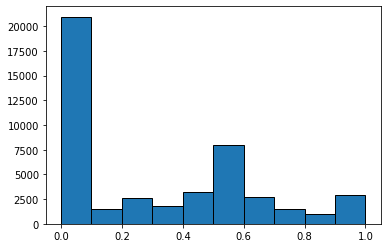

In [24]:
plt.hist(df2["subjectivity"], edgecolor = "black")

(array([   92.,   301.,   988.,  1334.,  1809., 31236.,  5020.,  2991.,
         1262.,  1282.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

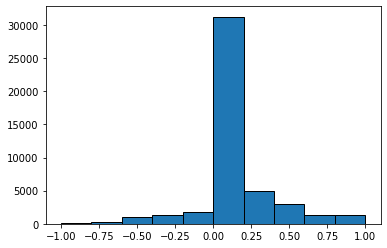

In [25]:
plt.hist(df2["polarity"], edgecolor = "black")

Text(0.5, 1.0, 'Sentiment Analysis - Subjectivity Ranking')

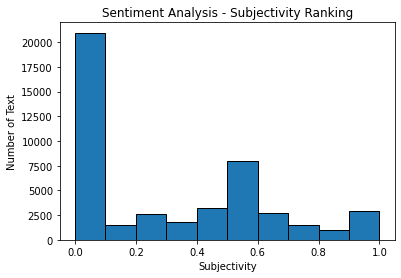

In [26]:
plt.hist(df2["subjectivity"], edgecolor = "black")
plt.xlabel("Subjectivity")
plt.ylabel ("Number of Text")
plt.title("Sentiment Analysis - Subjectivity Ranking")

In [27]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
sia = SentimentIntensityAnalyzer()
def analyze_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [29]:
def plot_sentiment(df2, feature, title):
    counts = df2[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    c = ['green', 'yellow', 'red']
    counts.plot(kind='bar', ax=ax1, color=c)
    percent.plot(kind='bar', ax=ax2, color=c)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

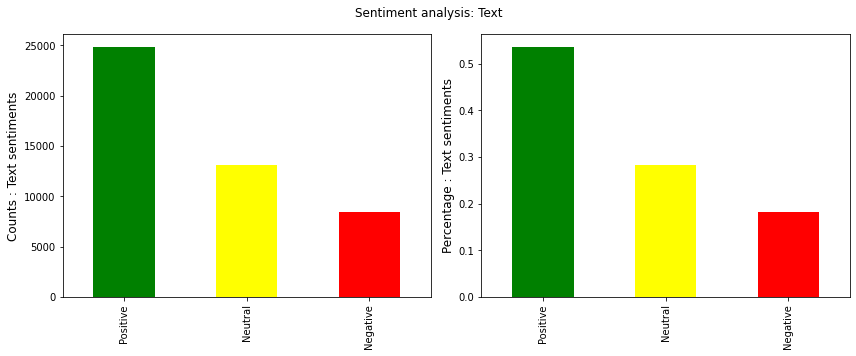

In [30]:
df2['text_sentiment'] = df2['text'].apply(lambda x: analyze_sentiment(x))
plot_sentiment(df2, 'text_sentiment', 'Text')